<a href="https://colab.research.google.com/github/JCaballerot/Credit-Scoring/blob/main/ExploracionyPautaCrediticia/Lab_Taiwan_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>
Default en Tarjetas de crédito de clientes en Taiwan</font></h1>

---

<img src="https://i.ytimg.com/vi/EH06RwKI8W4/maxresdefault.jpg" alt="HTML5 Icon" width= "800px"  height = "300px">
<div style="text-align: center">¿Quienes son los clientes más morosos? </div>

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Lectura y revisión de datos</a>  
2. <a href="#item32">Análisis de mora en variables categóricas</a>  
3. <a href="#item33">Análisis de mora en variables numéricas</a>  
4. <a href="#item34">Definiendo una pauta crediticia</a>  
5. <a href="#item34">Pautas con Decision Trees</a>  
</font>
</div>

## Introducción

En este laboratorio, aprenderá a usar python para comprender el análisis de mora y la creación de pautas crediticias.

<b>Descripción de datos</b>

El data frame tiene 30,000 filas y 23 columnas.


---
Esta investigación empleó una variable binaria, default (Sí = 1, No = 0), como variable de respuesta.

Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:



---

*   **LIMIT_BAL X1**: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

*   **SEX X2**: Género (1 = masculino; 2 = femenino).

*   **EDUCATION X3**: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).

*   **MARRIAGE X4**: Estado civil (1 = casado; 2 = soltero; 3 = otros).

*   **AGE X5**: Edad (año).

*   **PAY_0-PAY_6 X6 - X11:** Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:
La escala de medición del estado de amortización es:

  >-1 = pagar debidamente;</a>  
  >1 = retraso en el pago de un mes; </a>  
  >2 = retraso en el pago de dos meses;</a>  
  >8 = retraso en el pago de ocho meses; </a>  
  >9 = retraso en el pago de nueve meses o más.</a>  

*   **BILL_AMT1-BILL_AMT6 X12-X17**: Importe del estado de cuenta (dólar NT) (de abril a septiembre de 2005).

*   **PAY_AMT1-PAY_AMT6 X18-X23**: Monto del pago anterior (dólar NT) desde (de abril a septiembre de 2005).

---



<strong>Puede consultar este [link](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#) para leer más sobre la fuente de datos Taiwan Bank.</strong>

## 1. Lectura y revisión de datos

In [1]:
import pandas as pd

In [ ]:
pddf = pd.read_csv('credit_card_clients.csv', delimiter = ';')
pddf.head()

In [ ]:
pddf.shape

In [ ]:
pddf.describe().transpose()

In [6]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10, 6)})

In [ ]:
# Analizando el target
sns.countplot(x = 'default', data = pddf, palette = 'hls')


In [9]:
pddf.groupby('default')['ID'].count()

default
0    23364
1     6636
Name: ID, dtype: int64

In [11]:
pddf.default.sum()/pddf.default.count()

0.2212

In [12]:
pddf.default.mean()

0.2212

In [ ]:
# Indentificar las variables
features = list(set(pddf.columns.tolist()) - set(['ID','default']))
features

## 2. Análisis de mora en variables categóricas

In [ ]:
# Analizando variable categórica
sns.countplot(x='SEX', data = pddf, palette = 'hls')

In [ ]:

pddf.groupby(['SEX']).agg({"ID":"count",
                           "default" :"mean"}).reset_index()


In [ ]:
dfRes = pddf.groupby(['SEX']).agg({"ID":"count", "default" :"mean"}).reset_index()

sns.lineplot(data = dfRes, x = 'SEX', y = 'default')

In [ ]:
table = pd.crosstab(pddf.SEX, pddf.default)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [ ]:
pddf.groupby(['EDUCATION']).agg({"ID":"count",
                           "default" :"mean"}).reset_index()


In [ ]:
pddf.groupby(['MARRIAGE']).agg({"ID":"count",
                           "default" :"mean"}).reset_index()

## 3. Análisis de mora en variables numéricas

In [ ]:
# Analizando variable numérica
sns.displot(pddf, x="AGE",kind="kde", fill=True)

In [ ]:
sns.displot(pddf, x="AGE", hue='default', kind="kde", fill=True)

In [ ]:
ax = sns.boxplot(x="default", y="AGE", data=pddf, palette = 'hls')

In [ ]:
# Discretizar variable



*   Categorización experta
*   Categorización estadística
*   Categorización Cuantílica
*   Variables Dummy
*   Categorización K-means, otros. (Featured based models)


### 3.1. Categorización experta

In [61]:
def age_discretizer(x):
  if x < 25:
    return 'a. < 25'
  elif x < 30:
    return 'b. [25 - 30>'
  elif x < 45:
    return 'c. [30 - 40>'
  elif x < 60:
    return 'd. [40 - 50>'
  else:
    return 'e. >= 50'


In [62]:
pddf['AGE_CAT_EXP'] = pddf.AGE.apply(lambda x: age_discretizer(x))



In [ ]:
temp = pddf.groupby(['AGE_CAT_EXP']).agg({"ID":"count", "default" :"mean"}).reset_index()
temp = temp.rename(columns = {'ID' : 'N', 'default' : 'ratio_default'})
temp

In [ ]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8, 4)})

fig, ax = plt.subplots()
ax = sns.barplot(data = temp, x = 'AGE_CAT_EXP', y = 'N', color = 'lightskyblue')
ax2 = ax.twinx()
ax2 = sns.lineplot(data = temp, x = 'AGE_CAT_EXP', y = 'ratio_default', ax = ax2, color = 'red')
ax2.set_ylim(0, 0.4)

ax.set_xlabel('Rango de edad')

### 3.2. Categorización Estadística

In [ ]:
pddf.AGE.hist()

In [73]:
max = pddf.AGE.max()
min = pddf.AGE.min()

amplitud = max - min
rango = amplitud/6


In [ ]:
min + rango

In [ ]:
min + rango*2

In [80]:
# Discretizar variable
from sklearn.preprocessing import KBinsDiscretizer

pddf['AGE_cat'] = KBinsDiscretizer(n_bins = 5,
                                   encode = 'ordinal',
                                   strategy = "uniform").fit_transform(pddf[['AGE']])


In [ ]:
sns.displot(pddf['AGE_cat'], palette = 'hls', discrete=True)

In [ ]:
temp = pddf.groupby(['AGE_cat']).agg({"ID":"count", "default" :"mean"}).reset_index()
temp = temp.rename(columns = {'ID' : 'N', 'default' : 'ratio_default'})
temp

In [ ]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8, 4)})

fig, ax = plt.subplots()
ax = sns.barplot(data = temp, x = 'AGE_cat', y = 'N', color = 'lightskyblue')
ax2 = ax.twinx()
ax2 = sns.lineplot(data = temp, x = 'AGE_cat', y = 'ratio_default', ax = ax2, color = 'red')
ax2.set_ylim(0, 0.4)

ax.set_xlabel('Rango de edad')

### 3.3. Categorización Cuantilica

In [84]:
# Discretizar variable
from sklearn.preprocessing import KBinsDiscretizer

pddf['AGE_cuant'] = KBinsDiscretizer(n_bins = 8,
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(pddf[['AGE']])


In [ ]:
temp = pddf.groupby(['AGE_cuant']).agg({"ID":"count", "default" :"mean"}).reset_index()
temp = temp.rename(columns = {'ID' : 'N', 'default' : 'ratio_default'})
temp

Text(0.5, 0, 'Rango de edad')

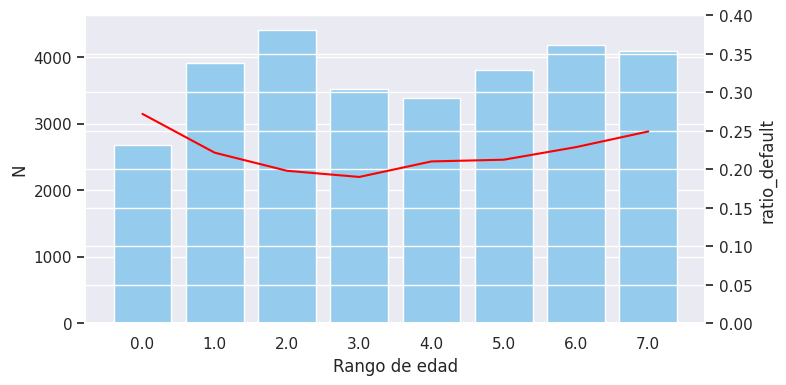

In [86]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8, 4)})

fig, ax = plt.subplots()
ax = sns.barplot(data = temp, x = 'AGE_cuant', y = 'N', color = 'lightskyblue')
ax2 = ax.twinx()
ax2 = sns.lineplot(data = temp, x = 'AGE_cuant', y = 'ratio_default', ax = ax2, color = 'red')
ax2.set_ylim(0, 0.4)

ax.set_xlabel('Rango de edad')

## 4. Definiendo una pauta Crediticia

## 5. Pautas Crediticias con decision Trees

In [ ]:
features

In [ ]:
#Variables para el modelo

numFeatures = ['AGE']
catFeatures = ['EDUCATION','MARRIAGE','SEX']


In [ ]:
X = pddf[numFeatures]
y = pddf.default

In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 2,
                               random_state = 123)
dtree = dtree.fit(X, y)

dtree

DecisionTreeClassifier(max_depth=2, random_state=123)

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


---

# Gracias por completar este laboratorio!

---

